In [1]:
import pandas as pd 
df= pd.read_csv(r"C:\Users\Rohan\Pictures\rohan\csv. file\agriculture.csv") 

In [2]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [3]:
df.drop('Unnamed: 8',axis=1,inplace=True)

In [4]:
df.drop('Unnamed: 9',axis=1,inplace=True)

In [5]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

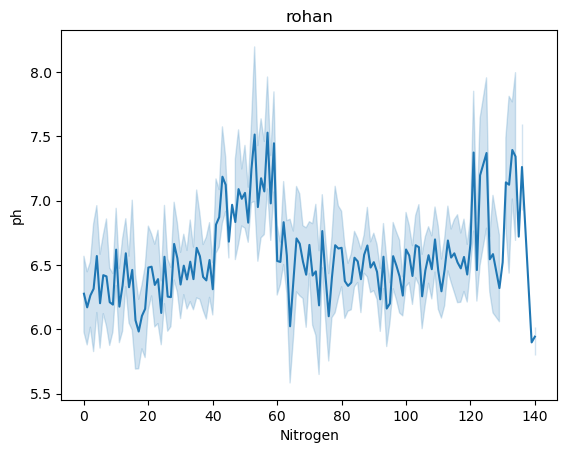

In [7]:
sns.lineplot(data=df,x='Nitrogen',y='ph')
plt.title('rohan')
plt.show()

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = df.drop('label',axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Preprocessed Data:\n", X_scaled_df.head())

Preprocessed Data:
    Nitrogen  phosphorus  potassium  temperature  humidity        ph  rainfall
0  1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868  2.898373


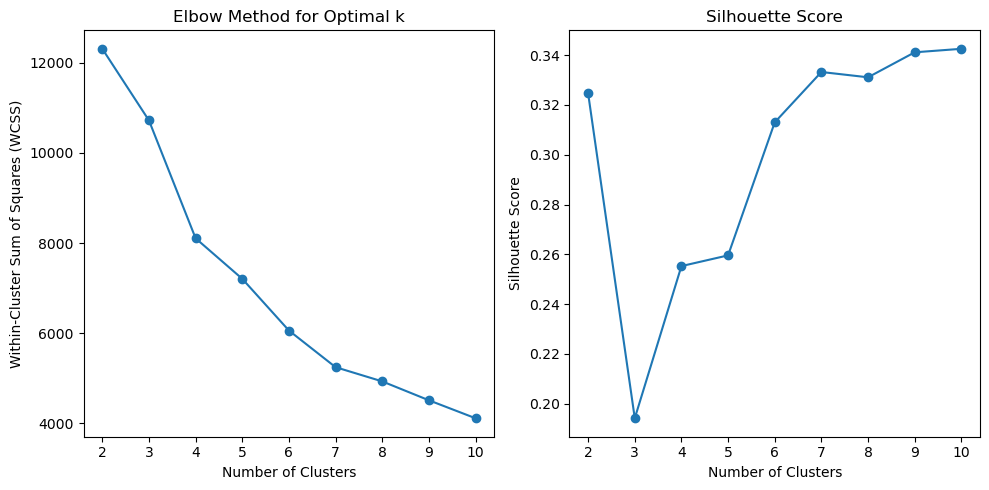

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters to try
k_range = range(2, 11)
wcss_scores = []
silhouette_scores = []

# Fit K-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss_scores.append(kmeans.inertia_)  # Within-cluster sum of squares
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


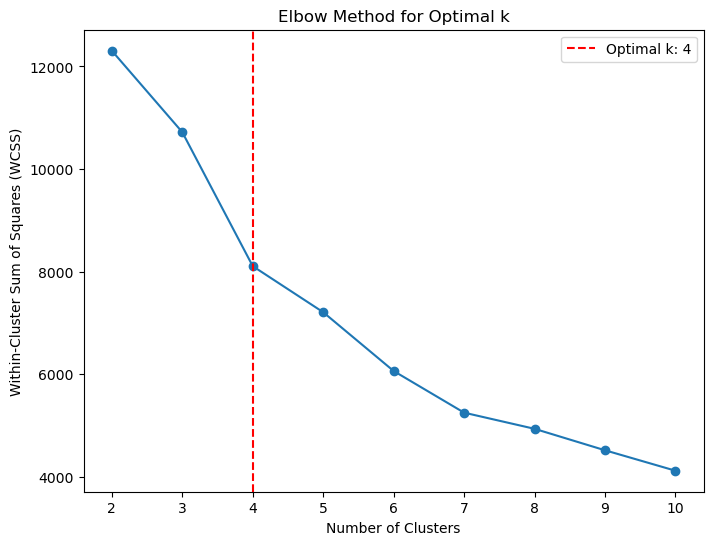

Optimal number of clusters (k): 4


In [10]:
import numpy as np

deltas = np.diff(wcss_scores)
acceleration = np.diff(deltas)

elbow_index = np.argmax(acceleration) + 1  
optimal_k = k_range[elbow_index]

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.legend()
plt.show()

print("Optimal number of clusters (k):", optimal_k)


In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

n_clusters = 4

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_scaled)


GaussianMixture(n_components=4, random_state=42)

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans.labels_)
silhouette_agg_clustering = silhouette_score(X_scaled, agg_clustering.labels_)
silhouette_dbscan = silhouette_score(X_scaled, dbscan.labels_)
silhouette_gmm = silhouette_score(X_scaled, gmm.predict(X_scaled))

# Compute Calinski-Harabasz Index
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans.labels_)
calinski_harabasz_agg_clustering = calinski_harabasz_score(X_scaled, agg_clustering.labels_)
# Calinski-Harabasz Index is not applicable for DBSCAN
calinski_harabasz_gmm = calinski_harabasz_score(X_scaled, gmm.predict(X_scaled))

# Compute Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans.labels_)
davies_bouldin_agg_clustering = davies_bouldin_score(X_scaled, agg_clustering.labels_)
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan.labels_)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, gmm.predict(X_scaled))

# Print the scores
print("Silhouette Score:")
print("K-Means:", silhouette_kmeans)
print("Hierarchical Clustering:", silhouette_agg_clustering)
print("DBSCAN:", silhouette_dbscan)
print("Gaussian Mixture Models:", silhouette_gmm)
print("\nCalinski-Harabasz Index:")
print("K-Means:", calinski_harabasz_kmeans)
print("Hierarchical Clustering:", calinski_harabasz_agg_clustering)
print("Gaussian Mixture Models:", calinski_harabasz_gmm)
print("\nDavies-Bouldin Index:")
print("K-Means:", davies_bouldin_kmeans)
print("Hierarchical Clustering:", davies_bouldin_agg_clustering)
print("DBSCAN:", davies_bouldin_dbscan)
print("Gaussian Mixture Models:", davies_bouldin_gmm)


Silhouette Score:
K-Means: 0.25526916389002857
Hierarchical Clustering: 0.2592304693088373
DBSCAN: -0.09360967426076917
Gaussian Mixture Models: 0.2425684913615672

Calinski-Harabasz Index:
K-Means: 658.6969498661996
Hierarchical Clustering: 629.472501911232
Gaussian Mixture Models: 634.0394233732741

Davies-Bouldin Index:
K-Means: 1.386621974857969
Hierarchical Clustering: 1.426909735115703
DBSCAN: 1.4367002448210406
Gaussian Mixture Models: 1.4556704703732062


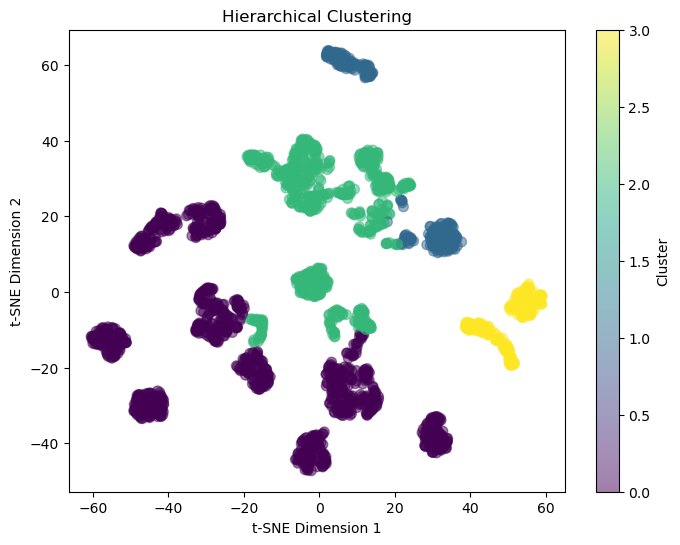

In [17]:
import matplotlib.pyplot as plt

# Plot the clusters obtained from Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_clustering.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


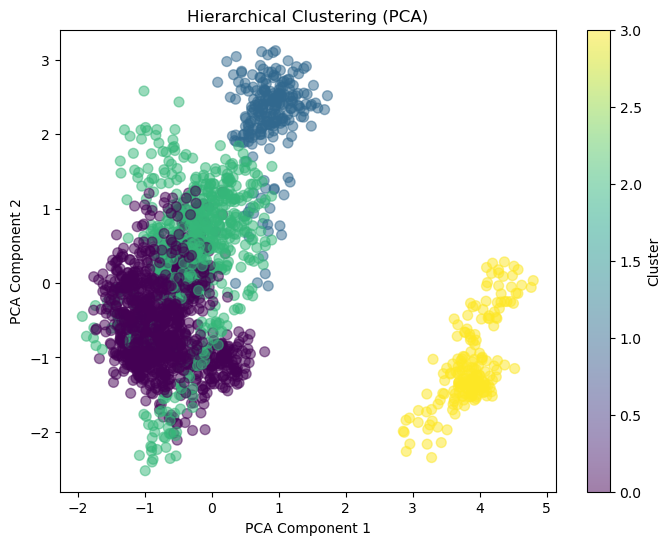

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters obtained from Hierarchical Clustering using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clustering.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
